In [1]:
import pywt
import pywt.data
from scipy import stats

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import logging
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
df = pd.read_csv('Vectors/train_vectors.csv')
df

,0,1,2,3,4,5,6,7,8,9,...,71631,71632,71633,71634,71635,71636,71637,71638,71639,label
0,-0.067809,-0.762047,-0.416549,1.948780,-0.204773,-1.173839,0.891810,6.308520,-5.814393,-6.315438,...,24.663651,-16.041805,3.792237,26.276817,-11.069938,-3.624025,25.414349,-22.712777,10.467984,brushteeth
1,1.948881,0.089588,-1.481125,1.246552,-0.710476,-0.501820,5.934144,-3.905442,-5.526724,3.676435,...,16.002344,8.534853,-13.493778,14.220339,10.775161,-14.457247,-0.300201,36.714152,-21.434704,brushteeth
2,0.608966,0.111772,-0.421240,1.382751,3.767596,-5.178909,-3.908713,4.963886,-0.009010,-0.895327,...,-0.438185,-7.412204,6.885995,1.840333,-1.365980,1.303971,-4.925619,-6.564344,16.002344,brushteeth
3,0.393348,5.717174,-6.658844,-4.901330,5.990080,0.902252,0.318163,-2.076030,0.654516,0.299967,...,1.033757,30.331619,-22.185490,6.437911,24.663651,-16.041805,3.792237,26.276817,-11.069938,brushteeth
4,4.882826,-2.975979,-5.192090,4.430301,-0.966184,-1.624804,2.188635,1.718568,-1.537346,-0.924258,...,-22.185490,6.437911,24.663651,-16.041805,3.792237,26.276817,-11.069938,-3.624025,25.414349,brushteeth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,0.354850,5.182399,-5.283611,-5.884059,5.669845,0.900192,-1.430650,-0.033996,2.168475,-0.272175,...,10.775161,-14.457247,-0.300201,36.714152,-21.434704,1.033757,30.331619,-22.185490,6.437911,washingdishes
625,-0.102379,-0.501262,0.989186,0.733201,-2.129133,-0.595606,2.682647,6.106321,-7.347481,-5.927908,...,30.331619,-22.185490,6.437911,24.663651,-16.041805,3.792237,26.276817,-11.069938,-3.624025,washingdishes
626,0.438779,0.291876,-0.399282,-0.438077,-0.283263,1.786172,-0.855093,-1.535304,1.708284,6.457285,...,1.033757,30.331619,-22.185490,6.437911,24.663651,-16.041805,3.792237,26.276817,-11.069938,washingdishes
627,-0.274897,0.614944,0.964166,-0.100663,0.799849,-0.915927,-1.652198,7.660341,-4.281876,-7.224406,...,6.437911,24.663651,-16.041805,3.792237,26.276817,-11.069938,-3.624025,25.414349,-22.712777,washingdishes


In [36]:
df_test = pd.read_csv('Vectors/test_vectors.csv')
df_test

,0,1,2,3,4,5,6,7,8,9,...,71631,71632,71633,71634,71635,71636,71637,71638,71639,label
0,0.500560,2.042234,-0.683245,-1.861128,-0.276811,5.894530,-4.573988,-5.499111,5.062628,1.005403,...,-8.330282,22.371421,-8.633193,2.614822,5.448048,-3.144809,8.171989,2.278302,-8.991496,brushteeth
1,0.643649,-0.295176,-0.336119,1.561823,-0.239892,-0.624344,5.763033,-4.356357,-6.128288,4.691753,...,-19.147186,4.396462,5.857947,-16.061605,2.324723,6.834325,-4.829285,-19.891230,14.635877,brushteeth
2,-0.657838,1.429356,-0.097346,-1.709545,2.169270,-0.802036,-1.598768,1.379972,6.317248,-6.194265,...,-14.457247,-0.300201,36.714152,-21.434704,1.033757,30.331619,-22.185490,6.437911,24.663651,brushteeth
3,0.618285,1.256593,0.015521,1.256918,4.557412,-8.134831,-5.118843,6.982020,0.348970,-0.263611,...,1.033757,30.331619,-22.185490,6.437911,24.663651,-16.041805,3.792237,26.276817,-11.069938,brushteeth
4,1.529639,1.309762,-2.402831,0.921179,0.288996,5.644719,-5.679211,-6.757829,6.137587,0.212079,...,6.437911,24.663651,-16.041805,3.792237,26.276817,-11.069938,-3.624025,25.414349,-22.712777,brushteeth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0.088790,0.550510,5.826408,-5.255708,-5.747785,3.242717,2.016320,8.415044,-7.655692,-6.365683,...,-0.300201,36.714152,-21.434704,1.033757,30.331619,-22.185490,6.437911,24.663651,-16.041805,washingdishes
149,0.135863,1.527756,-0.464990,1.015993,6.663202,-7.632777,-6.619300,7.239605,-1.498852,-0.926963,...,15.875364,-3.366091,-3.125773,9.086895,8.112893,-4.813356,-3.566037,16.244801,-1.792880,washingdishes
150,0.891223,0.635882,0.549134,-0.447213,-1.946594,1.290435,-0.423329,2.939634,-1.077305,-3.632372,...,4.307329,-36.688645,18.899124,5.048667,-33.470864,23.242556,2.588803,-35.752156,21.183962,washingdishes
151,5.006921,-4.160723,-5.478958,4.439456,0.608932,0.560813,-0.735392,-0.853024,1.868195,-0.422389,...,-8.330282,22.371421,-8.633193,2.614822,5.448048,-3.144809,8.171989,2.278302,-8.991496,washingdishes


In [4]:
labels = df['label']
le = preprocessing.LabelEncoder()
le.fit(labels)
labels = le.transform(labels)
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3

In [5]:
df['label'] = labels
df

,0,1,2,3,4,5,6,7,8,9,...,71631,71632,71633,71634,71635,71636,71637,71638,71639,label
0,-0.067809,-0.762047,-0.416549,1.948780,-0.204773,-1.173839,0.891810,6.308520,-5.814393,-6.315438,...,24.663651,-16.041805,3.792237,26.276817,-11.069938,-3.624025,25.414349,-22.712777,10.467984,0
1,1.948881,0.089588,-1.481125,1.246552,-0.710476,-0.501820,5.934144,-3.905442,-5.526724,3.676435,...,16.002344,8.534853,-13.493778,14.220339,10.775161,-14.457247,-0.300201,36.714152,-21.434704,0
2,0.608966,0.111772,-0.421240,1.382751,3.767596,-5.178909,-3.908713,4.963886,-0.009010,-0.895327,...,-0.438185,-7.412204,6.885995,1.840333,-1.365980,1.303971,-4.925619,-6.564344,16.002344,0
3,0.393348,5.717174,-6.658844,-4.901330,5.990080,0.902252,0.318163,-2.076030,0.654516,0.299967,...,1.033757,30.331619,-22.185490,6.437911,24.663651,-16.041805,3.792237,26.276817,-11.069938,0
4,4.882826,-2.975979,-5.192090,4.430301,-0.966184,-1.624804,2.188635,1.718568,-1.537346,-0.924258,...,-22.185490,6.437911,24.663651,-16.041805,3.792237,26.276817,-11.069938,-3.624025,25.414349,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,0.354850,5.182399,-5.283611,-5.884059,5.669845,0.900192,-1.430650,-0.033996,2.168475,-0.272175,...,10.775161,-14.457247,-0.300201,36.714152,-21.434704,1.033757,30.331619,-22.185490,6.437911,10
625,-0.102379,-0.501262,0.989186,0.733201,-2.129133,-0.595606,2.682647,6.106321,-7.347481,-5.927908,...,30.331619,-22.185490,6.437911,24.663651,-16.041805,3.792237,26.276817,-11.069938,-3.624025,10
626,0.438779,0.291876,-0.399282,-0.438077,-0.283263,1.786172,-0.855093,-1.535304,1.708284,6.457285,...,1.033757,30.331619,-22.185490,6.437911,24.663651,-16.041805,3.792237,26.276817,-11.069938,10
627,-0.274897,0.614944,0.964166,-0.100663,0.799849,-0.915927,-1.652198,7.660341,-4.281876,-7.224406,...,6.437911,24.663651,-16.041805,3.792237,26.276817,-11.069938,-3.624025,25.414349,-22.712777,10


In [61]:
# # Split train, test data with different dataset
train_data, test_data = train_test_split(df, test_size=0.3)
train_feature = train_data.drop(columns=['label'])
train_target = sorted(train_data['label'])

test_feature = test_data.drop(columns=['label'])
test_target = sorted(test_data['label'])
test_target

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10]

In [7]:
model = RandomForestClassifier(max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
print(model.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': True, 'random_state': 1, 'verbose': 0, 'warm_start': False}


In [9]:
param_grid = { "criterion" : ["gini", "entropy"],
               "min_samples_leaf" : [1, 5, 10],
               "min_samples_split" : [2, 4, 10, 12],
               "n_estimators": [50,100, 400 ]}
gs = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=10)
gs = gs.fit(train_feature, train_target)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV 1/3; 1/72] START criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 1/3; 1/72] END criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.143 total time=  11.4s
[CV 2/3; 1/72] START criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 2/3; 1/72] END criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.109 total time=  10.9s
[CV 3/3; 1/72] START criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 3/3; 1/72] END criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.082 total time=   9.9s
[CV 1/3; 2/72] START criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 1/3; 2/72] END criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.136 total time=  17.9s
[CV 2/3; 2/72] START criterion=gini, min_samples_leaf=1, min

In [69]:
best_model = gs.best_estimator_
best_model.score(test_feature, test_target)


0.08465608465608465

In [39]:
def roc_curve_plot(model_name, fpr, tpr, roc_auc):
    plt.plot(fpr, tpr, linewidth=2, label='Area(AUC) = %0.2f' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.title(model_name + ' ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()


In [43]:
test_target_main = []
filenames = []
for dir in os.listdir("testing_PCA"):
    for file in os.listdir(f"testing_PCA/{dir}"):
        filename = file.split('__')[0]



In [50]:
pred = best_model.predict(test_feature)
pred

array([ 6,  7,  1,  6,  6,  2,  7,  4, 10,  6, 10,  7,  1,  9,  9,  7,  2,
        7,  1,  0,  0,  7,  4,  2,  9,  7,  4,  7,  2,  2,  8, 10, 10, 10,
        7,  7, 10,  0,  4,  4,  7,  7,  7,  2,  7,  0, 10,  0,  9, 10,  7,
        0,  0,  1,  7,  7,  3,  2, 10,  8,  7,  7, 10,  7,  8,  7,  7,  9,
       10,  1,  1, 10,  7,  9,  9,  1, 10,  4,  7, 10,  9,  3,  3,  9,  9,
        7,  7,  8,  2,  3,  7,  1,  3,  0,  9,  3,  3,  4,  7,  9,  9,  2,
        4,  4,  7,  7,  3,  0,  7,  3,  1,  1,  0,  0, 10,  1,  6,  7,  0,
       10,  9,  9, 10,  4,  1,  4,  3,  9,  9,  9,  7,  1,  7,  0,  1, 10,
        7,  1,  3, 10,  2,  9,  7,  4,  4,  4,  9,  3,  7, 10,  9,  6,  0,
        2,  0, 10,  1,  1,  7,  4, 10,  7, 10,  7,  4,  7, 10,  7,  4, 10,
       10,  1,  9, 10,  1,  7,  7, 10,  1,  8,  3,  1,  0, 10,  7,  7,  3,
        7,  4])

In [67]:
print(classification_report(test_target, pred))

              precision    recall  f1-score   support

           0       0.12      0.09      0.11        22
           1       0.00      0.00      0.00        21
           2       0.18      0.13      0.15        15
           3       0.00      0.00      0.00        19
           4       0.06      0.06      0.06        18
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00         8
           7       0.04      0.11      0.06        19
           8       0.00      0.00      0.00        15
           9       0.05      0.06      0.05        18
          10       0.21      0.25      0.23        24

    accuracy                           0.07       189
   macro avg       0.06      0.06      0.06       189
weighted avg       0.07      0.07      0.07       189



c:\users\harys\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\harys\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\harys\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

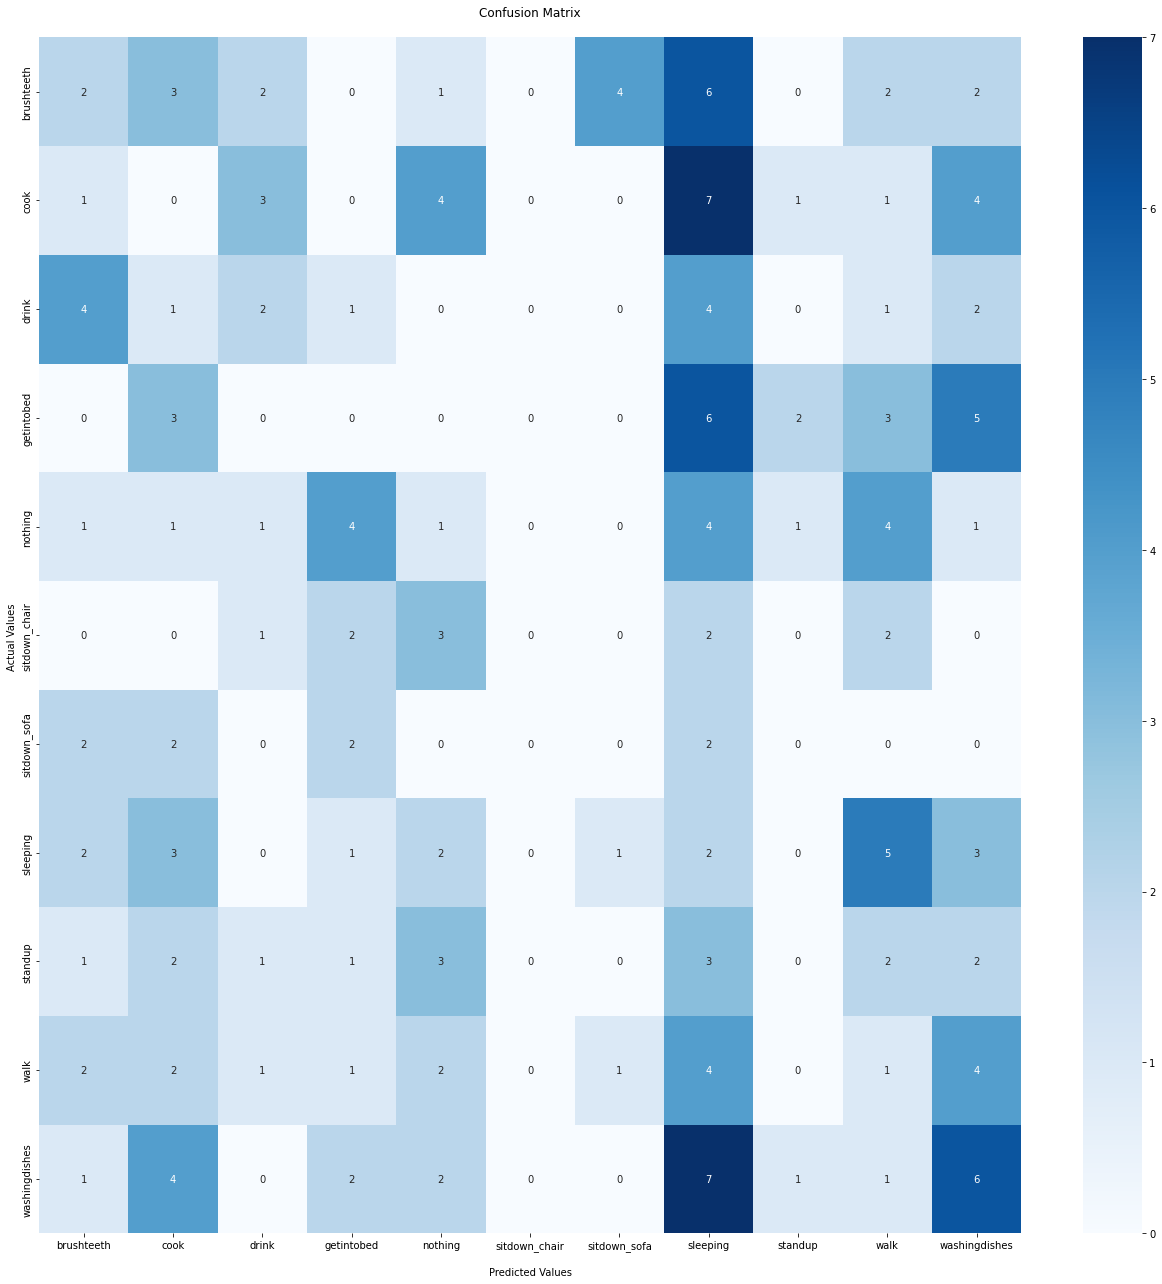

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (22, 22))
cf_matrix = confusion_matrix(test_target, pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(le.classes_)
ax.yaxis.set_ticklabels(le.classes_, rotation=90, va="center")
## Display the visualization of the Confusion Matrix.
plt.show()